# Material class example

In [24]:
%matplotlib inline
import neutronpy as npy
from neutronpy import Material
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

np.seterr(all="ignore");

In [14]:
print('numpy: ', np.__version__)
print('neutronpy: ', npy.__version__)
print('matplotlib: ', mpl.__version__)

numpy:  1.12.1
neutronpy:  1.0.5.dev1
matplotlib:  2.0.2


In [15]:
def_CeRhIn5 = {'name': 'CeRhIn5', 
               'composition': [{'ion': 'Ce', 'pos': [0, 0, 0]}, 
                               {'ion': 'Rh', 'pos': [0, 0, 0.5]}, 
                               {'ion': 'In', 'pos': [0.5, 0.5, 0]},
                               {'ion': 'In', 'pos': [0, 0.5, 0.3059]},
                               {'ion': 'In', 'pos': [0, 0.5, -0.3059]},
                               {'ion': 'In', 'pos': [0.5, 0, 0.3059]},
                               {'ion': 'In', 'pos': [0.5, 0, -0.3059]}], 
               'lattice': {'abc': [4.6551, 4.6551, 7.5426], 
                           'abg': [90, 90, 90]},  
               'massNorm': False, 
               'debye-waller': False}

def_CeRhIn5_sg = {'name': 'CeRhIn5', 
                  'composition': [{'ion': 'Ce', 'pos': [0, 0, 0]}, 
                                  {'ion': 'Rh', 'pos': [0, 0, 0.5]}, 
                                  {'ion': 'In', 'pos': [0.5, 0.5, 0]},
                                  {'ion': 'In', 'pos': [0, 0.5, 0.3059]},
                                  {'ion': 'In', 'pos': [0, 0.5, -0.3059]},
                                  {'ion': 'In', 'pos': [0.5, 0, 0.3059]},
                                  {'ion': 'In', 'pos': [0.5, 0, -0.3059]}], 
                  'lattice': {'abc': [4.6551, 4.6551, 7.5426], 
                              'abg': [90, 90, 90]}, 
                  'space_group': 'P4/mmm', 
                  'massNorm': False, 
                  'debye-waller': False}

In [16]:
CeRhIn5 = Material(def_CeRhIn5)
CeRhIn5_sg = Material(def_CeRhIn5_sg)

In [17]:
positions = []
for atom in CeRhIn5_sg.atoms:
    positions.append(atom.pos)
    print(atom.ion, atom.pos)

Ce [ 0.  0.  0.]
Rh [ 0.   0.   0.5]
Rh [ 0.   0.  -0.5]
In [ 0.5  0.5  0. ]
In [-0.5  0.5  0. ]
In [ 0.5 -0.5  0. ]
In [-0.5 -0.5  0. ]
In [ 0.5     0.      0.3059]
In [ 0.     -0.5     0.3059]
In [ 0.      0.5     0.3059]
In [ 0.     -0.5    -0.3059]
In [ 0.      0.5    -0.3059]
In [-0.5     0.      0.3059]
In [ 0.5     0.     -0.3059]
In [-0.5     0.     -0.3059]
In [ 0.5     0.     -0.3059]
In [ 0.     -0.5    -0.3059]
In [ 0.      0.5    -0.3059]
In [ 0.     -0.5     0.3059]
In [-0.5     0.     -0.3059]
In [ 0.      0.5     0.3059]
In [ 0.5     0.      0.3059]
In [-0.5     0.      0.3059]
In [ 0.5     0.     -0.3059]
In [-0.5     0.      0.3059]
In [ 0.5     0.      0.3059]
In [ 0.     -0.5     0.3059]
In [-0.5     0.     -0.3059]
In [ 0.      0.5     0.3059]
In [ 0.      0.5    -0.3059]
In [ 0.     -0.5    -0.3059]
In [ 0.5     0.      0.3059]
In [-0.5     0.     -0.3059]
In [ 0.5     0.     -0.3059]
In [ 0.     -0.5    -0.3059]
In [ 0.      0.5    -0.3059]
In [-0.5     0.      0

In [18]:
positions = []
for atom in CeRhIn5.atoms:
    positions.append(atom.pos)
    print(atom.ion, atom.pos)

Ce [0 0 0]
Rh [ 0.   0.   0.5]
In [ 0.5  0.5  0. ]
In [ 0.      0.5     0.3059]
In [ 0.      0.5    -0.3059]
In [ 0.5     0.      0.3059]
In [ 0.5     0.     -0.3059]


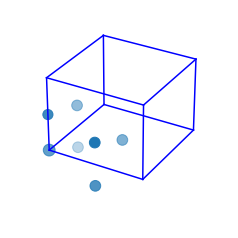

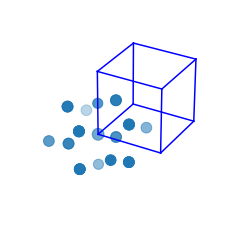

In [29]:
CeRhIn5.plot_unit_cell()
CeRhIn5_sg.plot_unit_cell()

In [20]:
print(CeRhIn5.calc_optimal_thickness(5) * 10)
print(CeRhIn5_sg.calc_optimal_thickness(5) * 10)

0.646670289736
0.0993403171066


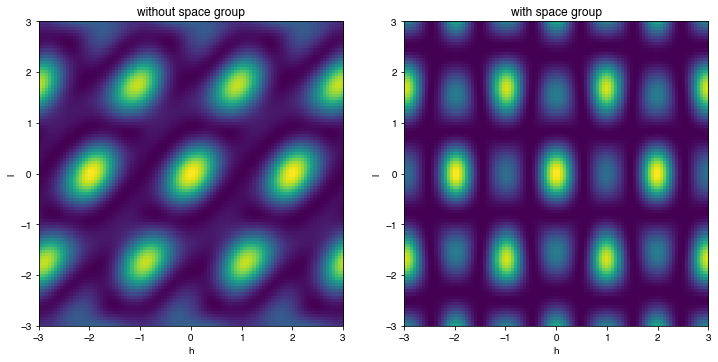

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

h, l = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
hkl = [h, h, l]
s = np.abs(CeRhIn5.calc_nuc_str_fac(hkl)) ** 2

ax1.imshow(s, extent=(h.min(), h.max(), l.min(), l.max()), origin='lower')
ax1.set_xlabel('h')
ax1.set_ylabel('l')
ax1.set_title('without space group')

s = np.abs(CeRhIn5_sg.calc_nuc_str_fac(hkl)) ** 2

ax2.imshow(s, extent=(h.min(), h.max(), l.min(), l.max()), origin='lower')
ax2.set_xlabel('h')
ax2.set_ylabel('l')
ax2.set_title('with space group');

In [22]:
npy.spurion.aluminum()

(h, k, l)  2theta  |F|^2  wavelength
------------------------------------
[1, 1, 1] 60.60 365.7846 lambda/1
[2, 0, 0] 71.26 218.5662 lambda/1
[2, 2, 0] 110.94 313.4148 lambda/1
[3, 1, 1] 150.05 1000.0000 lambda/1


In [23]:
npy.Energy(energy=14.7).wavelength

2.3590066172419952